<a href="https://colab.research.google.com/github/s-im-ran/Machine-Learning/blob/main/5_DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dat=pd.read_csv("/content/drive/MyDrive/drug200.csv")

In [ ]:
dat.describe()

,Age,Na_to_K,Sex_encoded,BP_encoded,Cholesterol_encoded,Drug_encoded
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,16.084485,0.520000,0.910000,0.485000,2.870000
std,16.544315,7.223956,0.500854,0.821752,0.501029,1.372047
min,15.000000,6.269000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,10.445500,0.000000,0.000000,0.000000,2.000000
50%,45.000000,13.936500,1.000000,1.000000,0.000000,3.000000
75%,58.000000,19.380000,1.000000,2.000000,1.000000,4.000000
max,74.000000,38.247000,1.000000,2.000000,1.000000,4.000000


In [ ]:
dat.shape

(200, 6)

In [ ]:
dat.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


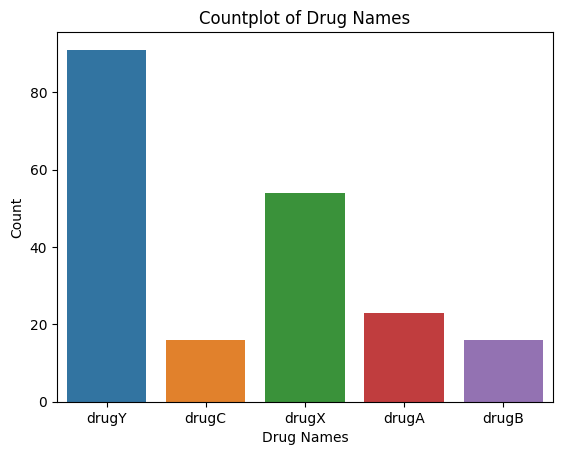

In [ ]:
sns.countplot(x=dat['Drug'], data=dat)
plt.xlabel('Drug Names')
plt.ylabel('Count')
plt.title('Countplot of Drug Names')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns_to_be_encoded=['Sex','BP','Cholesterol','Drug']
for column in columns_to_be_encoded:
  dat[column+'_encoded']=le.fit_transform(dat[column])

In [ ]:
dat.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_encoded,BP_encoded,Cholesterol_encoded,Drug_encoded
0,23,F,HIGH,HIGH,25.355,drugY,0,0,0,4
1,47,M,LOW,HIGH,13.093,drugC,1,1,0,2
2,47,M,LOW,HIGH,10.114,drugC,1,1,0,2
3,28,F,NORMAL,HIGH,7.798,drugX,0,2,0,3
4,61,F,LOW,HIGH,18.043,drugY,0,1,0,4


In [ ]:
data=dat.drop(['Sex','BP','Cholesterol','Drug'],axis=1)

In [ ]:
data.head()

,Age,Na_to_K,Sex_encoded,BP_encoded,Cholesterol_encoded,Drug_encoded
0,23,25.355,0,0,0,4
1,47,13.093,1,1,0,2
2,47,10.114,1,1,0,2
3,28,7.798,0,2,0,3
4,61,18.043,0,1,0,4


<ipython-input-13-2051860d02d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix =dat.corr()


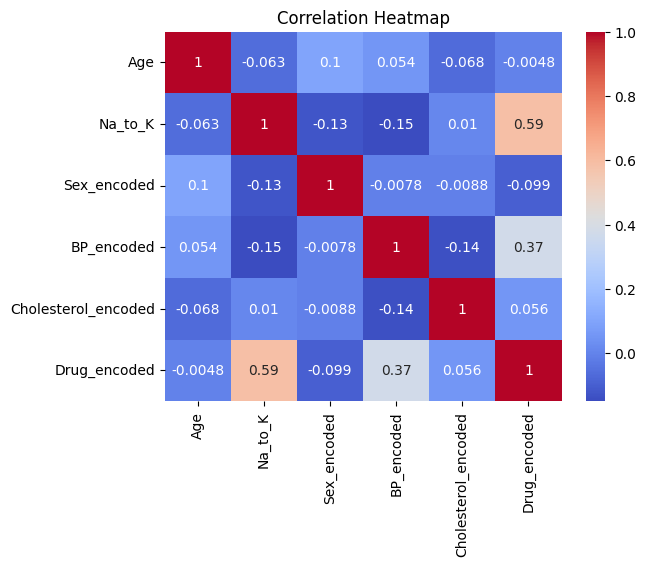

In [ ]:
correlation_matrix =dat.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X=data.drop(['Drug_encoded'],axis=1)
y=data['Drug_encoded']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)


In [ ]:
X_train.shape

(150, 5)

In [ ]:
X_train.head()

,Age,Na_to_K,Sex_encoded,BP_encoded,Cholesterol_encoded
114,20,9.281,0,2,1
173,41,18.739,0,1,1
5,22,8.607,0,2,0
126,66,16.347,1,0,0
117,40,10.103,0,2,0


In [ ]:
y_train.head()

114    3
173    4
5      3
126    4
117    3
Name: Drug_encoded, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
accuracy = clf.score(X_test, y_test)

In [ ]:
accuracy

1.0

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:", classification_rep)

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        20

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



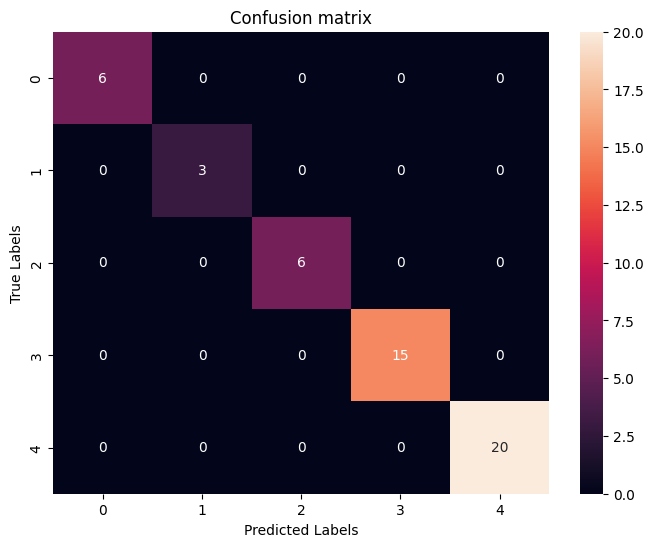

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion matrix')
plt.show()

In [ ]:
print(conf_matrix)

[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 15  0]
 [ 0  0  0  0 20]]


In [ ]:
import random
input=random.randint(0,len(X_test))
print(input)
predicted = clf.predict([X_test.iloc[input]])
predicted = clf.predict([X_test.iloc[input]])
print(predicted,true)
if (predicted==true):
  print("correct")
else:
  print("incorrect")

48
[4] 4
correct


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
